In [41]:
import pandas as pd
import numpy as np

In [163]:
train_label=pd.read_csv("./train.csv")

In [164]:
train

PassengerId  Pclass  Sex     Age  SibSp  Parch  Ticket       Fare  Cabin  \
0              1       3    1  22.000      1      0     720   7.250000      0   
1              2       1    0  38.000      1      0     816  71.312500    107   
2              3       3    0  26.000      0      0     914   7.925781      0   
3              4       1    0  35.000      1      0      65  53.093750     71   
4              5       3    1  35.000      0      0     649   8.046875      0   
..           ...     ...  ...     ...    ...    ...     ...        ...    ...   
886          887       2    1  27.000      0      0     130  13.000000      0   
887          888       1    0  19.000      0      0      18  30.000000     41   
888          889       3    0  29.875      1      2     923  23.453125      0   
889          890       1    1  26.000      0      0      11  30.000000     78   
890          891       3    1  32.000      0      0     642   7.750000      0   

     Embarked  first_name  Mr  second_name  Survived  
0           3         100  12          855         0  
1           1         182  13          601         1  
2           3         329   9          690         1  
3           3         267  13          541         1  
4           3          15  12         1102         0  
..        ...         ...  ..          ...       ...  
886         3         535  15          660         0  
887         3         294   9          749         1  
888         3         383   9          186         0  
889         1          69  12          669         1  
890         2         214  12          857         0  

[891 rows x 14 columns]

In [43]:
test=pd.read_csv("./test.csv")

In [44]:
train.shape

(891, 12)

In [45]:
test.shape

(418, 11)

In [46]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [47]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [49]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [50]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
train=train_label

In [52]:
num_feather=[]
obj_feather=[]
for col in train.columns:
    if train[col].dtype=='int' or train[col].dtype == 'float':
        num_feather.append(col)
    else:
        obj_feather.append(col)


In [53]:
num_feather

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [54]:
obj_feather

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [56]:
train["Ticket"].value_counts()

1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
PC 17599    1
250653      1
312991      1
34218       1
372622      1
Name: Ticket, Length: 681, dtype: int64

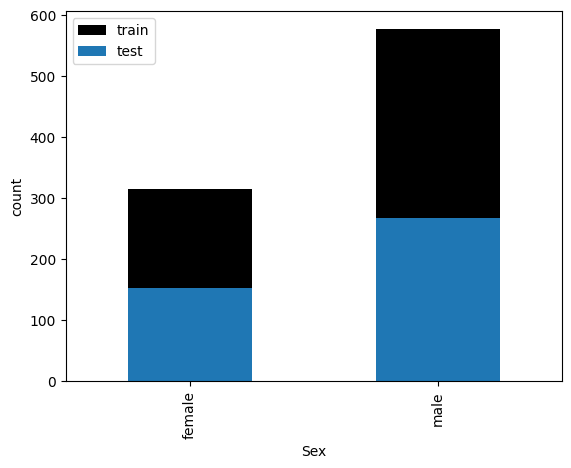

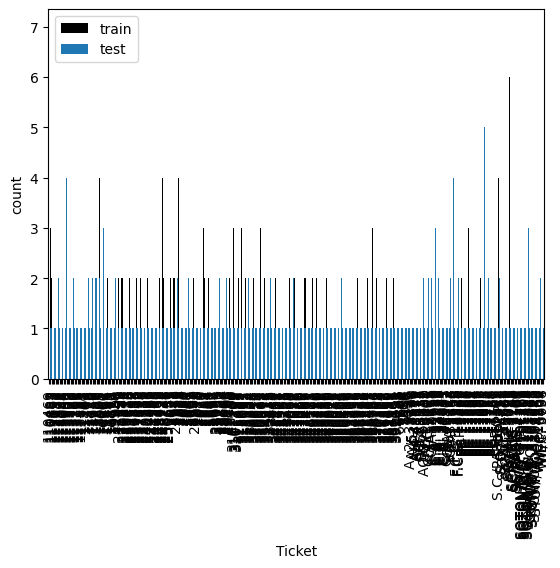

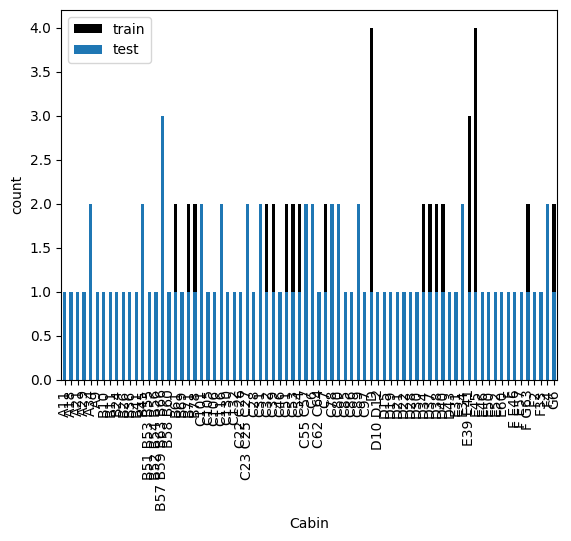

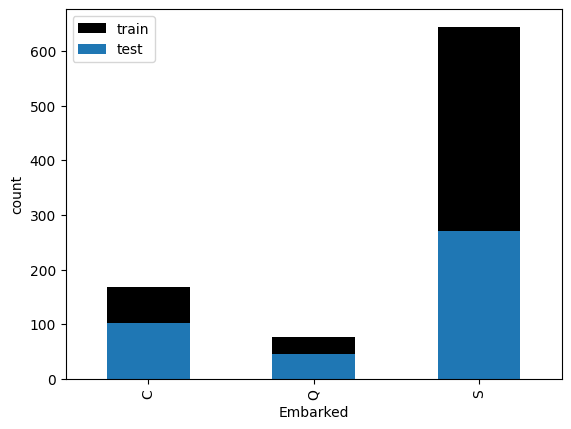

In [57]:
import matplotlib.pylab as plt
import seaborn as sns
for col in obj_feather:
    if col not  in "Name":
        train[col].value_counts().sort_index().plot(kind="bar",color="k")
        test[col].value_counts().sort_index().plot(kind="bar")
        plt.xlabel(col)
        plt.ylabel("count")
        plt.legend(["train","test"])
        plt.show()
    

In [58]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
train["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [60]:
train.loc[train["Survived"]==1,"Parch"].value_counts()

0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64

In [61]:
train.loc[train["Survived"]==0,"Parch"].value_counts()

0    445
1     53
2     40
4      4
5      4
3      2
6      1
Name: Parch, dtype: int64

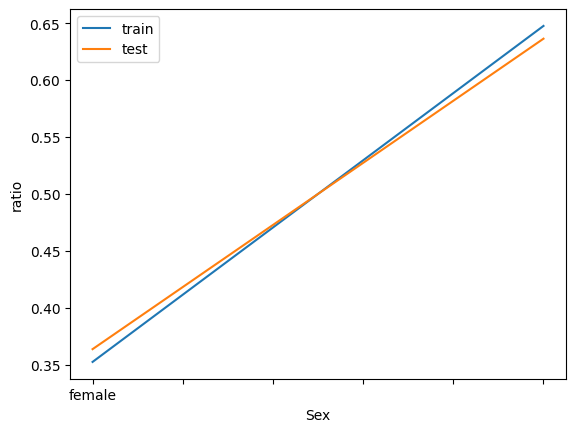

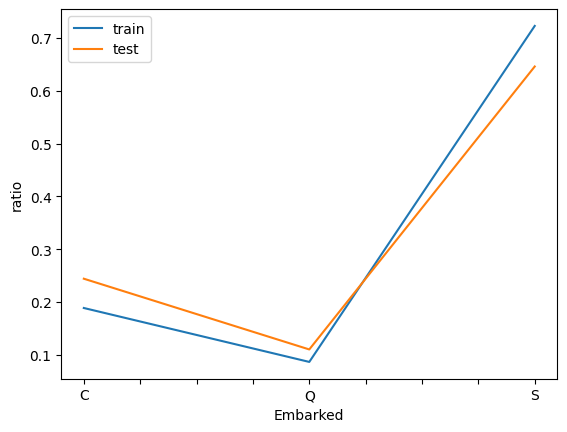

In [62]:
train_count = train.shape[0]
test_count = test.shape[0]
for feature in ["Sex","Embarked"]:
    (train[feature].value_counts().sort_index()/train_count).plot()
    (test[feature].value_counts().sort_index()/test_count).plot()
    plt.legend(['train','test'])
    plt.xlabel(feature)
    plt.ylabel('ratio')
    plt.show()



In [63]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [64]:
obj_feather

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [65]:
train.shape

(891, 12)

In [66]:
train=fulldata.iloc[:891]

In [67]:
train.shape

(891, 11)

In [68]:
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
train.Cabin.value_counts().sort_values(ascending=False)[:20]

0      687
81       4
185      4
61       4
181      3
118      3
80       3
182      3
149      3
174      2
100      2
103      2
153      2
113      2
43       2
184      2
180      2
31       2
171      2
25       2
Name: Cabin, dtype: int64

In [70]:
train.Cabin.fillna("-1",inplace=True)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [71]:
train["Ticket"].value_counts().sort_values(ascending=False)[:20]

104    7
459    7
778    7
775    6
464    6
335    6
847    5
659    5
541    4
107    4
924    4
454    4
43     4
787    4
49     4
123    4
260    4
671    4
833    4
145    3
Name: Ticket, dtype: int64

In [72]:
train["Age"].fillna(train["Age"].mean(),inplace=True)

In [73]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
fulldata=pd.concat([train.drop(columns="Survived"),test])

KeyError: "['Survived'] not found in axis"

In [ ]:
fulldata.Cabin.fillna("-1",inplace=True)

In [ ]:
fulldata.Age.fillna(fulldata.Age.mean(),inplace=True)

In [ ]:
fulldata.tail()

PassengerId  Pclass                          Name     Sex        Age  \
413         1305       3            Spector, Mr. Woolf    male  29.881138   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.000000   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.500000   
416         1308       3           Ware, Mr. Frederick    male  29.881138   
417         1309       3      Peter, Master. Michael J    male  29.881138   

     SibSp  Parch              Ticket      Fare Cabin Embarked  
413      0      0           A.5. 3236    8.0500    -1        S  
414      0      0            PC 17758  108.9000  C105        C  
415      0      0  SOTON/O.Q. 3101262    7.2500    -1        S  
416      0      0              359309    8.0500    -1        S  
417      1      1                2668   22.3583    -1        C

In [ ]:
fulldata.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       2
dtype: int64

In [ ]:
fulldata.Fare.fillna(0,inplace=True)

In [ ]:
fulldata.to_csv("./fulldata.csv")

In [ ]:
fulldata.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [ ]:
fulldata.fillna("-1",inplace=True)

In [ ]:
fulldata.Embarked.value_counts()

S     914
C     270
Q     123
-1      2
Name: Embarked, dtype: int64

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
onehotencoder=OneHotEncoder(sparse=False)
onehotencoder.fit(fulldata[['Ticket', 'Cabin', 'Embarked']])

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
onehotencoder.transform(fulldata[['Ticket', 'Cabin', 'Embarked']]).shape

(1309, 1120)

In [ ]:
def change_object_cols(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)), index=value)).values

for col in ['Ticket', 'Cabin', 'Embarked', 'Sex']:
    fulldata[col] = change_object_cols(fulldata[col])

In [ ]:
fulldata.Fare=fulldata.Fare.astype(np.float32)

In [ ]:
fulldata.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object

In [ ]:
fulldata["Ticket"].nunique()

929

In [ ]:
fulldata["Cabin"].nunique()

187

In [ ]:
fulldata["Embarked"].nunique()

4

In [ ]:
fulldata.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object

In [ ]:
fulldata

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
413         1305       3                                 Spector, Mr. Woolf   
414         1306       1                       Oliva y Ocana, Dona. Fermina   
415         1307       3                       Saether, Mr. Simon Sivertsen   
416         1308       3                                Ware, Mr. Frederick   
417         1309       3                           Peter, Master. Michael J   

        Sex        Age  SibSp  Parch              Ticket     Fare Cabin  \
0      male  22.000000      1      0           A/5 21171     7.25    -1   
1    female  38.000000      1      0            PC 17599  71.2833   C85   
2    female  26.000000      0      0    STON/O2. 3101282    7.925    -1   
3    female  35.000000      1      0              113803     53.1  C123   
4      male  35.000000      0      0              373450     8.05    -1   
..      ...        ...    ...    ...                 ...      ...   ...   
413    male  29.881138      0      0           A.5. 3236     8.05    -1   
414  female  39.000000      0      0            PC 17758    108.9  C105   
415    male  38.500000      0      0  SOTON/O.Q. 3101262     7.25    -1   
416    male  29.881138      0      0              359309     8.05    -1   
417    male  29.881138      1      1                2668  22.3583    -1   

    Embarked  Sex_F  Sex_M  
0          S    NaN    NaN  
1          C    NaN    NaN  
2          S    NaN    NaN  
3          S    NaN    NaN  
4          S    NaN    NaN  
..       ...    ...    ...  
413        S    NaN    NaN  
414        C    NaN    NaN  
415        S    NaN    NaN  
416        S    NaN    NaN  
417        C    NaN    NaN  

[1309 rows x 13 columns]

In [ ]:
sex=pd.DataFrame(result.toarray(),columns=["sex_1","sex_2"])

In [ ]:
sex.reindex()

index  sex_1  sex_2
0         0    0.0    1.0
1         1    1.0    0.0
2         2    1.0    0.0
3         3    1.0    0.0
4         4    0.0    1.0
...     ...    ...    ...
1304   1304    0.0    1.0
1305   1305    1.0    0.0
1306   1306    0.0    1.0
1307   1307    0.0    1.0
1308   1308    0.0    1.0

[1309 rows x 3 columns]

In [ ]:
fulldata.drop(columns=["Sex_F","Sex_M"],inplace=True)

In [ ]:
final_train=pd.concat([train_label["Survived"],train],axis=1)

In [ ]:
final_train.isnull().sum()

Survived       0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Survived


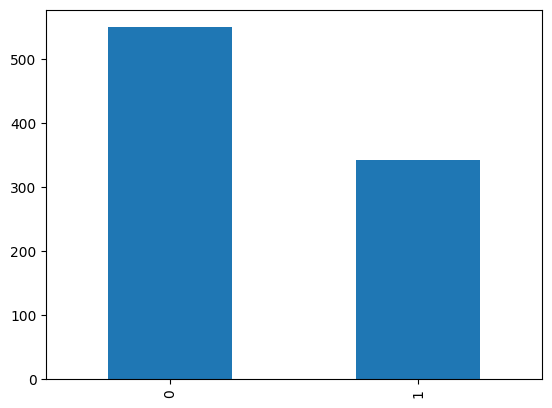

PassengerId


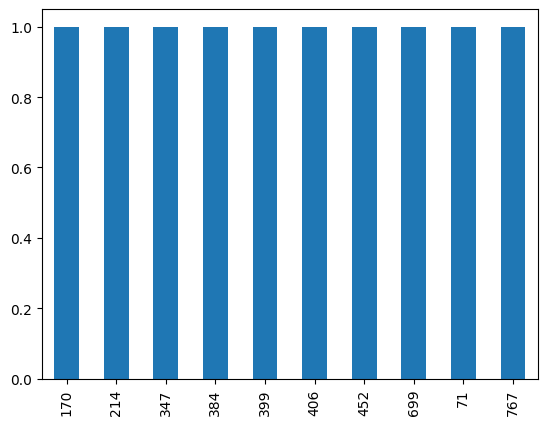

Pclass


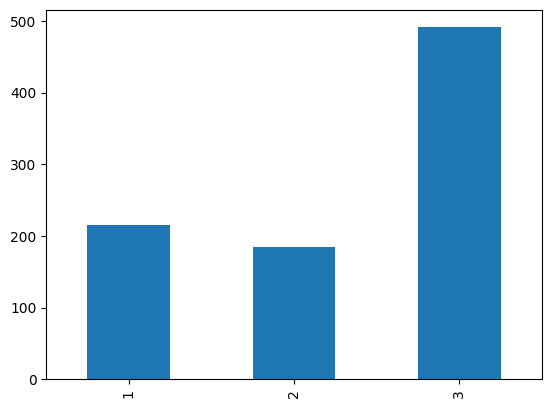

Name


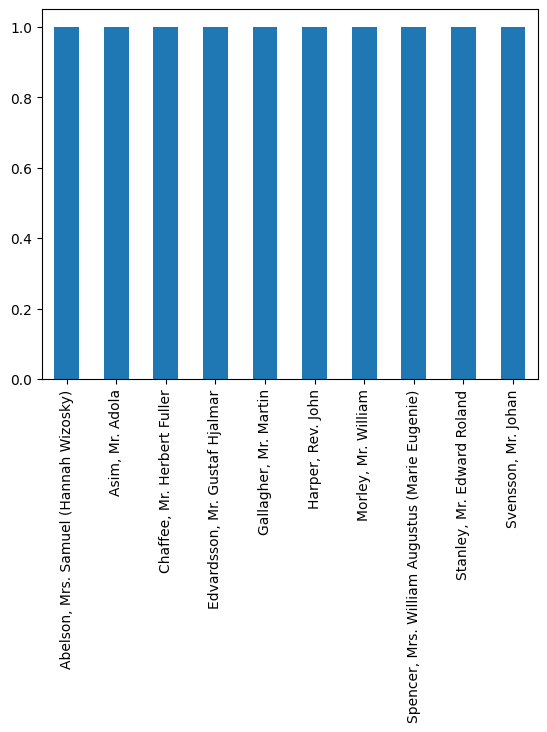

Sex


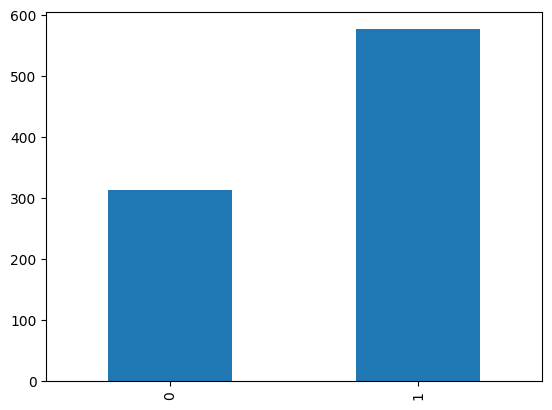

Age


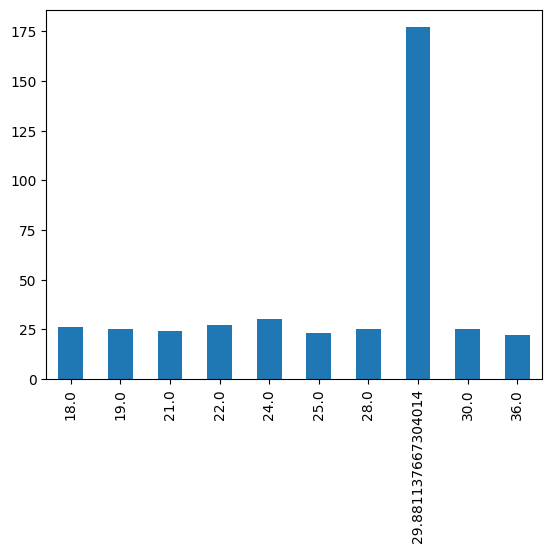

SibSp


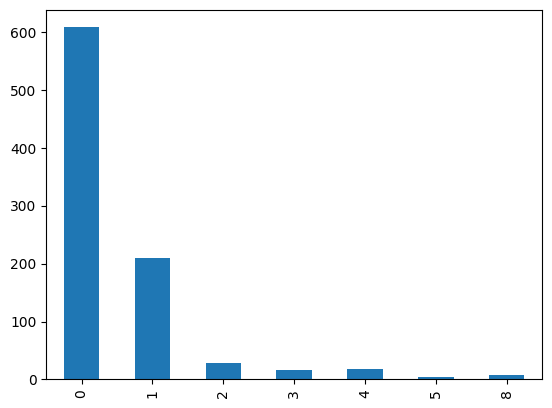

Parch


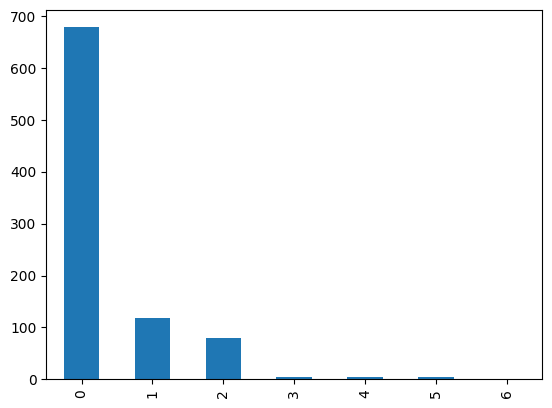

Ticket


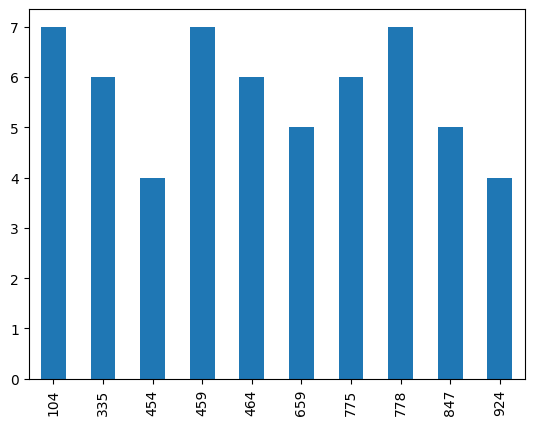

Fare


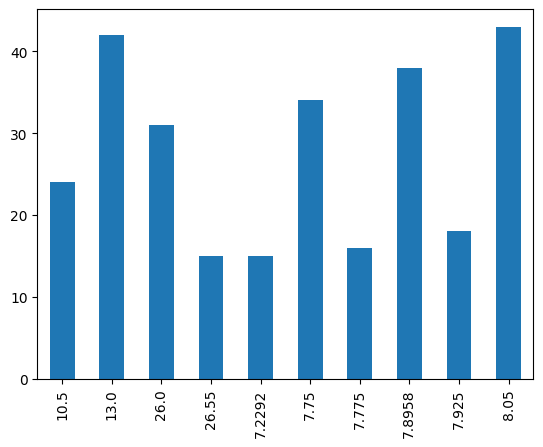

Cabin


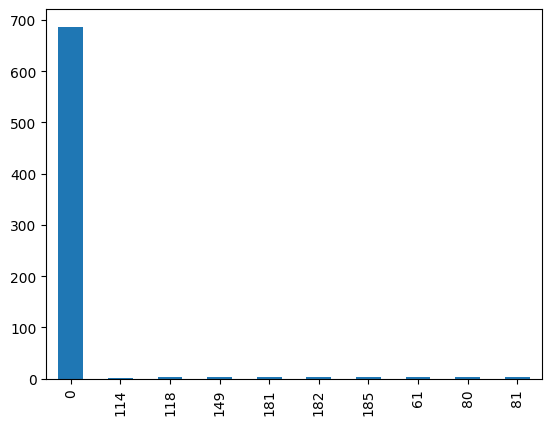

Embarked


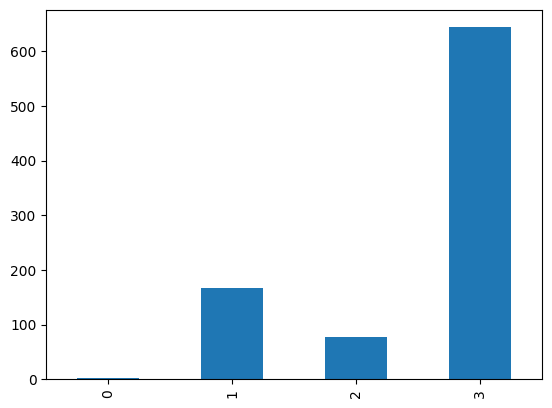

In [ ]:
# 简单看下每个离散字段Top10的数量分布
for col in final_train:
    final_train[col].astype(str).value_counts()[:10].sort_index().plot.bar()
    print(col)
    plt.show()
# 结论：在建模思路还不明确的情况下，参赛者可适当进行数据探查，也不必盲目面面俱到，做到心中有数
# 对数据结构有个清晰的了解，以便后续快速进行构思与方案验证

# 特征提取

In [ ]:
final_train

Survived  PassengerId  Pclass  \
0           0            1       3   
1           1            2       1   
2           1            3       3   
3           1            4       1   
4           0            5       3   
..        ...          ...     ...   
886         0          887       2   
887         1          888       1   
888         0          889       3   
889         1          890       1   
890         0          891       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                                 ...  ...        ...    ...   
886                              Montvila, Rev. Juozas    1  27.000000      0   
887                       Graham, Miss. Margaret Edith    0  19.000000      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0  29.881138      1   
889                              Behr, Mr. Karl Howell    1  26.000000      0   
890                                Dooley, Mr. Patrick    1  32.000000      0   

     Parch  Ticket       Fare  Cabin  Embarked  
0        0     720   7.250000      0         3  
1        0     816  71.283302    107         1  
2        0     914   7.925000      0         3  
3        0      65  53.099998     71         3  
4        0     649   8.050000      0         3  
..     ...     ...        ...    ...       ...  
886      0     130  13.000000      0         3  
887      0      18  30.000000     41         3  
888      2     923  23.450001      0         3  
889      0      11  30.000000     78         1  
890      0     642   7.750000      0         2  

[891 rows x 12 columns]

In [ ]:
final_train.dtypes

Survived         int64
PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float32
Cabin            int64
Embarked         int64
dtype: object

In [ ]:
for col in final_train.columns:
    if col !="Name":    
        print(col+"   corr:"+ str(final_train[col].corr(final_train["Survived"])))

Survived   corr:1.0
PassengerId   corr:-0.0050066607670664915
Pclass   corr:-0.3384810359610148
Sex   corr:-0.5433513806577546
Age   corr:-0.07032267528829975
SibSp   corr:-0.03532249888573557
Parch   corr:0.08162940708348361
Ticket   corr:-0.16673394152180945
Fare   corr:0.2573065198151091
Cabin   corr:0.27788451732811337
Embarked   corr:-0.17650922516888237


In [ ]:
fulldata.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
obj_feather

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
num_feather

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
fulldata.PassengerId.nunique()

1309

In [ ]:
fulldata.shape

(1309, 11)

In [ ]:
Name=fulldata.Name

In [ ]:
Name_1=[]
for i in Name:
    Name_2=i.split(',')
    Name_1.append(Name_2)

In [ ]:
Name=pd.DataFrame(Name_1,columns=["first_name","second_name"])

In [96]:
Name__1=pd.DataFrame(Name.first_name)

In [99]:
Name__1

first_name
0            Braund
1           Cumings
2         Heikkinen
3          Futrelle
4             Allen
...             ...
1304        Spector
1305  Oliva y Ocana
1306        Saether
1307           Ware
1308          Peter

[1309 rows x 1 columns]

In [120]:
fulldata["first_name"]=fulldata.Name.apply(lambda x:x.split(',')[0])

In [121]:
fulldata["Mr"]=fulldata.Name.apply(lambda x:x.split(',')[1].split(".")[0])

In [122]:
fulldata["second_name"]=fulldata.Name.apply(lambda x:x.split(',')[1].split(".")[1])

In [126]:
for col in ["first_name","Mr","second_name"]:
    fulldata[col]=change_object_cols(fulldata[col])

In [129]:
fulldata.drop("Name",inplace=True,axis=1)

In [130]:
fulldata.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'first_name', 'Mr', 'second_name'],
      dtype='object')

In [124]:
fulldata.second_name.value_counts()

 John                                       15
 William                                    11
 Patrick                                    10
 James                                       9
 Joseph                                      7
                                            ..
 William Baird                               1
 Percy C (Mary Phyllis Elizabeth Miller)     1
 Phillippe                                   1
 Alfred Edward                               1
 Manda                                       1
Name: second_name, Length: 1126, dtype: int64

In [114]:
fulldata_1.head()

PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  Embarked  
0    1  22.0      1      0     720   7.2500      0         3  
1    0  38.0      1      0     816  71.2833    107         1  
2    0  26.0      0      0     914   7.9250      0         3  
3    0  35.0      1      0      65  53.1000     71         3  
4    1  35.0      0      0     649   8.0500      0         3

In [87]:
final_name=Name.second_name.apply(lambda x:x.split("."))

0                                  [ Mr,  Owen Harris]
1       [ Mrs,  John Bradley (Florence Briggs Thayer)]
2                                      [ Miss,  Laina]
3               [ Mrs,  Jacques Heath (Lily May Peel)]
4                                [ Mr,  William Henry]
                             ...                      
1304                                     [ Mr,  Woolf]
1305                                 [ Dona,  Fermina]
1306                           [ Mr,  Simon Sivertsen]
1307                                 [ Mr,  Frederick]
1308                             [ Master,  Michael J]
Name: second_name, Length: 1309, dtype: object

In [131]:
fulldata.to_csv("./fulldata.csv")

In [132]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int64  
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Ticket       1309 non-null   int64  
 7   Fare         1309 non-null   float64
 8   Cabin        1309 non-null   int64  
 9   Embarked     1309 non-null   int64  
 10  first_name   1309 non-null   int64  
 11  Mr           1309 non-null   int64  
 12  second_name  1309 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 175.5 KB


In [134]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [135]:
fulldata=reduce_mem_usage(fulldata)

Mem. usage decreased to  0.07 Mb (61.2% reduction)


In [136]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int16  
 1   Pclass       1309 non-null   int8   
 2   Sex          1309 non-null   int8   
 3   Age          1309 non-null   float16
 4   SibSp        1309 non-null   int8   
 5   Parch        1309 non-null   int8   
 6   Ticket       1309 non-null   int16  
 7   Fare         1309 non-null   float16
 8   Cabin        1309 non-null   int16  
 9   Embarked     1309 non-null   int8   
 10  first_name   1309 non-null   int16  
 11  Mr           1309 non-null   int8   
 12  second_name  1309 non-null   int16  
dtypes: float16(2), int16(5), int8(6)
memory usage: 68.1 KB


In [137]:
num_feather

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [141]:
obj_feather.append("first_name","Mr","second_name")

TypeError: list.append() takes exactly one argument (3 given)

In [146]:
 obj_feather=obj_feather[:5]

In [148]:
obj_feather

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [149]:

for col in ["first_name","Mr","second_name"]:
   obj_feather.append(col)

In [151]:
obj_feather=obj_feather[1:]

In [152]:
obj_feather

['Sex', 'Ticket', 'Cabin', 'Embarked', 'first_name', 'Mr', 'second_name']

In [153]:
num_feather

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [154]:
fulldata.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'first_name', 'Mr', 'second_name'],
      dtype='object')

In [155]:
fulldata.Ticket.value_counts()

778    11
104     8
775     8
335     7
454     7
       ..
407     1
408     1
409     1
410     1
506     1
Name: Ticket, Length: 929, dtype: int64

In [156]:
aggs = {}
for col in num_feather:
    aggs[col] = ['nunique', 'mean', 'min', 'max','var','skew', 'sum']
for col in obj_feather:
    aggs[col] = ['nunique']    

In [157]:
cols = ['card_id']
for key in aggs.keys():
    cols.extend([key+'_'+stat for stat in aggs[key]])

In [160]:
train_label

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [165]:
train=pd.concat([fulldata[:891],train_label["Survived"]],axis=1)

In [166]:
train.to_csv("final_train.csv")

In [1]:
import pandas as pd

In [2]:
train_label=pd.read_csv("train.csv")

In [9]:
fulldata=pd.read_csv("fulldata.csv")

In [10]:
fulldata

Unnamed: 0  PassengerId  Pclass  Sex        Age  SibSp  Parch  Ticket  \
0              0            1       3    1  22.000000      1      0     720   
1              1            2       1    0  38.000000      1      0     816   
2              2            3       3    0  26.000000      0      0     914   
3              3            4       1    0  35.000000      1      0      65   
4              4            5       3    1  35.000000      0      0     649   
...          ...          ...     ...  ...        ...    ...    ...     ...   
1304         413         1305       3    1  29.881138      0      0     711   
1305         414         1306       1    0  39.000000      0      0     834   
1306         415         1307       3    1  38.500000      0      0     872   
1307         416         1308       3    1  29.881138      0      0     579   
1308         417         1309       3    1  29.881138      1      1     262   

          Fare  Cabin  Embarked  first_name  Mr  second_name  
0       7.2500      0         3         100  12          855  
1      71.2833    107         1         182  13          601  
2       7.9250      0         3         329   9          690  
3      53.1000     71         3         267  13          541  
4       8.0500      0         3          15  12         1102  
...        ...    ...       ...         ...  ..          ...  
1304    8.0500      0         3         753  12         1119  
1305  108.9000     65         1         593   3          366  
1306    7.2500      0         3         699  12          973  
1307    8.0500      0         3         827  12          390  
1308   22.3583      0         1         634   8          799  

[1309 rows x 14 columns]

In [4]:
fulldata.reset_index(inplace=True)

In [5]:
fulldata=fulldata.iloc[:,2:]

In [6]:
train=pd.read_csv("final_train.csv")

In [16]:
fulldata.columns

Index(['Unnamed: 0', 'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'first_name', 'Mr',
       'second_name'],
      dtype='object')

In [11]:
test=fulldata[891:]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
def param_grid_search(train):
    """
    网格搜索参数寻优
    :param train:训练集
    :return:最优的分类器模型
    """
    print('param_grid_search')
    features = train.columns.tolist()
    features.remove("PassengerId")
    features.remove("Survived")
    parameter_space = {
        "n_estimators": range(60,80),
        "min_samples_leaf": range(2,5),
        "min_samples_split": range(5,10),
        "max_depth": range(3,8),
        "max_features": range(5,10)
    }

    print("Tuning hyper-parameters for mse")
    clf = RandomForestClassifier(
        criterion="entropy",
        min_weight_fraction_leaf=0.1,
        max_leaf_nodes=None,
        min_impurity_decrease=0.1,
        #min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=-1,
        random_state=2020,
        verbose=1,
        warm_start=False)
    grid = GridSearchCV(clf, parameter_space, cv=2, scoring="accuracy")
    grid.fit(train[features].values, train['Survived'].values)

    print("best_params_:")
    print(grid.best_params_)
    means = grid.cv_results_["mean_test_score"]
    stds = grid.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    return grid.best_estimator_


def train_predict(train, test, best_clf):
    """
    进行训练和预测输出结果
    :param train:训练集
    :param test:测试集
    :param best_clf:最优的分类器模型
    :return:
    """
    print('train_predict...')
    features = train.columns.tolist()
    features.remove("PassengerId")
    features.remove("Survived")

    prediction_test = 0
    cv_score = []
    prediction_train = pd.Series()
    kf = KFold(n_splits=5, random_state=2020, shuffle=True)
    for train_part_index, eval_index in kf.split(train[features], train['Survived']):
        best_clf.fit(train[features].loc[train_part_index].values, train['Survived'].loc[train_part_index].values)
        prediction_test += best_clf.predict(test[features].values)
        eval_pre = best_clf.predict(train[features].loc[eval_index].values)
        score = np.sqrt(log_loss(train['Survived'].loc[eval_index].values, eval_pre))
        cv_score.append(score)
        print(score)
        prediction_train = prediction_train.append(pd.Series(best_clf.predict(train[features].loc[eval_index]),
                                                             index=eval_index))
    print(cv_score, sum(cv_score) / 5)
    pd.Series(prediction_train.sort_index().values).to_csv("train_randomforest.csv", index=False)
    pd.Series(prediction_test / 5).to_csv("test_randomforest.csv", index=False)
    test['Survived'] = (prediction_test / 5)
    test['Survived']=test['Survived'].apply(lambda x:1 if x>0.5 else 0)
    test[['PassengerId', 'Survived']].to_csv("submission_randomforest.csv", index=False)
    return


if __name__ == "__main__":


    # 获取最优分类器模型
    best_clf = param_grid_search(train)

    # 获取结果
    train_predict(train, test, best_clf)
# [3.6952175995861753, 3.653405245049519, 3.711542672510601, 3.78859477721067, 3.586786511640954] 3.687109361199584




param_grid_search
Tuning hyper-parameters for mse


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  61 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  61 out of  61 | elapsed: 

best_params_:
{'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 60}
0.774 (+/-0.007) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 60}
0.776 (+/-0.009) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 61}
0.780 (+/-0.018) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 62}
0.779 (+/-0.016) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 63}
0.779 (+/-0.016) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 64}
0.774 (+/-0.007) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 65}
0.774 (+/-0.007) for {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 66}
0.772 (+/-0.003

[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: 

2.881352082891496
2.5455368613811653
2.699949564664414
[3.0101916293333857, 2.699949564664414, 2.881352082891496, 2.5455368613811653, 2.699949564664414] 2.767395940586975


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done  60 out of  60 | elapsed:    0.0s finished
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_

In [ ]:
def kfold_lightgbm(train_df, test_df, num_folds, stratified = False, debug= False):
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

    # Cross validation model
    if stratified:
        folds = StratifiedKFold(n_splits= num_folds, shuffle=True, random_state=326)
    else:
        folds = KFold(n_splits= num_folds, shuffle=True, random_state=326)

    train_df['xgboost'] = pd.read_csv("preprocess/train_xgboost.csv", header=None)[0].values
    test_df['xgboost'] = pd.read_csv("preprocess/test_xgboost.csv", header=None)[0].values

    # Create arrays and dataframes to store results
    oof_preds = np.zeros(train_df.shape[0])
    sub_preds = np.zeros(test_df.shape[0])
    feature_importance_df = pd.DataFrame()
    feats = [f for f in train_df.columns if f not in FEATS_EXCLUDED]

    # k-fold
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['outliers'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['target'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['target'].iloc[valid_idx]

        # set data structure
        lgb_train = lgb.Dataset(train_x,
                                label=train_y,
                                free_raw_data=False)
        lgb_test = lgb.Dataset(valid_x,
                               label=valid_y,
                               free_raw_data=False)

        # params optimized by optuna
        params ={
                'task': 'train',
                'boosting': 'goss',
                'objective': 'regression',
                'metric': 'rmse',
                'learning_rate': 0.01,
                'subsample': 0.9855232997390695,
                'max_depth': 7,
                'top_rate': 0.9064148448434349,
                'num_leaves': 63,
                'min_child_weight': 41.9612869171337,
                'other_rate': 0.0721768246018207,
                'reg_alpha': 9.677537745007898,
                'colsample_bytree': 0.5665320670155495,
                'min_split_gain': 9.820197773625843,
                'reg_lambda': 8.2532317400459,
                'min_data_in_leaf': 21,
                'verbose': -1,
                'seed':int(2**n_fold),
                'bagging_seed':int(2**n_fold),
                'drop_seed':int(2**n_fold)
                }

        reg = lgb.train(
                        params,
                        lgb_train,
                        valid_sets=[lgb_train, lgb_test],
                        valid_names=['train', 'test'],
                        num_boost_round=10000,
                        early_stopping_rounds= 200,
                        verbose_eval=100
                        )

        oof_preds[valid_idx] = reg.predict(valid_x, num_iteration=reg.best_iteration)
        sub_preds += reg.predict(test_df[feats], num_iteration=reg.best_iteration) / folds.n_splits

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        fold_importance_df["importance"] = np.log1p(reg.feature_importance(importance_type='gain', iteration=reg.best_iteration))
        fold_importance_df["fold"] = n_fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        print('Fold %2d RMSE : %.6f' % (n_fold + 1, rmse(valid_y, oof_preds[valid_idx])))
        del reg, train_x, train_y, valid_x, valid_y
        gc.collect()

    # display importances
    display_importances(feature_importance_df)

    if not debug:
        # save submission file
        test_df.loc[:,'target'] = sub_preds
        test_df = test_df.reset_index()
        test_df[['card_id', 'target']].to_csv(submission_file_name, index=False)


NameError: name 'get_scorer_names' is not defined

In [ ]:
import pandas as pd

In [ ]:
sub=pd.read_csv("submission_randomforest.csv")

In [ ]:
sub.Survived=sub.Survived.apply(lambda x: 0 if x>0.5 else 1 )

In [ ]:
sub.Survived.value_counts()

1    297
0    121
Name: Survived, dtype: int64

In [ ]:
sub.to_csv("")